In questa esercitazione andrò a testare il generatore di numeri pseudocasuali, e a scrivere delle funzioni che mi permettando di estenderne le funzionalità al fine di campionare nuove distribuzioni di probabilità. Infine, effettuerò una simulazione che coinvolgerà una semplice applicazione del generatore.

# Esercizio 01.1

Ho testato il generatore di numeri pseudo casuali (in particolare la funzione Rannyu, che genera numeri casuali distribuiti uniformemente nell'intervallo tra 0 e 1) calcolando media e varianza della distribuzione che viene campionata.
Il programma che ho scritto effettua dapprima le $10^6$ estrazioni di numeri casuali, poi effettua la divisione in blocchi e calcola media e varianza con i rispettivi errori. In questo modo un solo run del generatore viene sfruttato per portare a termine tutti i compiti. Anche il calcolo del $\chi^2$ viene portato a termine sfruttando la stessa simulazione.

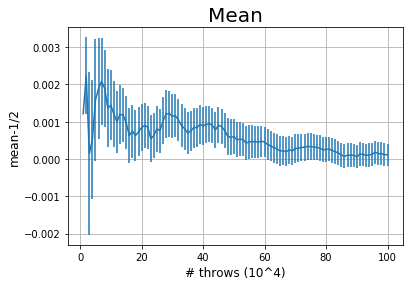

In [2]:
import matplotlib.pyplot as plt

filename = "esercizio01_1/mean.txt"

blocks = []
mean = []
mean_err = []

f = open(filename, 'r')

for row in f:
    row = row.split("  ")
    blocks.append(row[0])
    mean.append(row[1])
    mean_err.append(row[2])
    
blocks_ = [float(x_blocks) for x_blocks in blocks]
mean_ = [float(x_mean)-0.5 for x_mean in mean]
mean_err_ = [float(x_mean_err) for x_mean_err in mean_err]
    
#print(mean_err)
  
plt.errorbar(blocks_, mean_, yerr = mean_err_)
  
plt.xlabel('# throws (10^4)', fontsize = 12)
plt.ylabel('mean-1/2', fontsize = 12)
  
plt.title('Mean', fontsize = 20)
plt.grid(True)
plt.show()

#print(cont)
f.close()

Come si può notare, la media è sempre compatibile entro due deviazioni standard con il valore teorico 1/2, e a $10^6$ tiri, entro una deviazione standard.

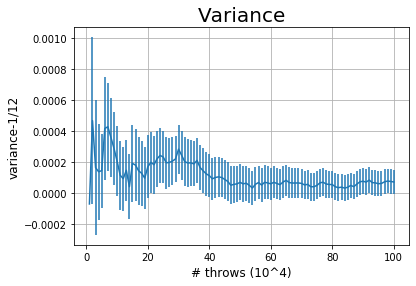

In [3]:
import matplotlib.pyplot as plt

filename = "esercizio01_1/var.txt"

blocks = []
var = []
var_err = []

f = open(filename, 'r')

for row in f:
    row = row.split("  ")
    blocks.append(row[0])
    var.append(row[1])
    var_err.append(row[2])
    
blocks_ = [float(x_blocks) for x_blocks in blocks]
var_ = [float(x_var)-1./12. for x_var in var]
var_err_ = [float(x_var_err) for x_var_err in var_err]
  
plt.errorbar(blocks_, var_, yerr = var_err_)
  
plt.xlabel('# throws (10^4)', fontsize = 12)
plt.ylabel('variance-1/12', fontsize = 12)
  
plt.title('Variance', fontsize = 20)
plt.grid(True)
plt.show()

f.close()

Anche per la varianza vediamo esserci sempre una compatibilità entro le due deviazioni standard con il valore teorico 1/12.

per il calcolo del $\chi^2$ ho dovuto dividere in sottointervalli l'intervallo di campionamento $[0,1)$. Per individuare l'intervallino di appartenenza di ogni numero pseudo casuale generato, ho scritto appositamente un codice di ricerca binaria al fine di ridurre il numero di operazioni ed aumentare quindi l'efficienza. Il codice è implementato nella funzione "dataInIntervals" della classe "distributionAnalyzer".

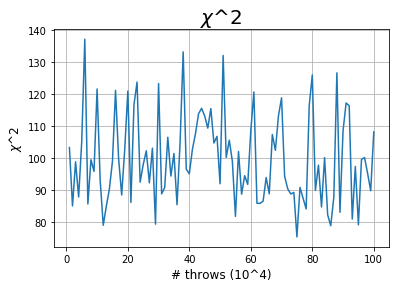

In [4]:
import matplotlib.pyplot as plt

filename = "esercizio01_1/chi.txt"

blocks = []
chi = []

f = open(filename, 'r')

for row in f:
    row = row.split("  ")
    blocks.append(row[0])
    chi.append(row[1])
    
blocks_ = [float(x_blocks) for x_blocks in blocks]
chi_ = [float(x_chi) for x_chi in chi]
  
plt.plot(blocks_, chi_)
  
plt.xlabel('# throws (10^4)', fontsize = 12)
plt.ylabel('$\chi$^2', fontsize = 12)
  
plt.title('$\chi$^2', fontsize = 20)
plt.grid(True)
plt.show()

f.close()

Come era atteso, per ogni set di dati il $\chi^2$ si attesta attorno al valore di 100 e non aumenta mai in maniera significativa.

# Esercizio 01.2

Ho scritto delle funzioni che sfruttano il campionamento di numeri uniformamente distribuiti nell'intervallo $[0,1)$ per campionare la distribuzione esponenziale e quella lorentziana. Ho campionato la somma di $N$ estrazioni $S_N$ per verificare il teorema del limite centrale nel caso di utilizzo di distribuzione uniforme ed esponenziale. Sappiamo infatti che la distribuzione gaussiana è (nello spazio funzionale delle distribuzioni di probabilità) un attrattore in questi due ultimi casi. nel caso della distribuzione lorentziana, l'attrattore non è più una gaussiana (il secondo momento diverge). Nei seguenti specchietti Python grafico gli istogrammi con i risultati delle mie simulazioni. 

## Dado standard

Di seguito riporto il caso del dado standard, con gli istogrammi relativi, rispettivamente, a $S_1$, $S_2$, $S_{10}$, $S_{100}$:

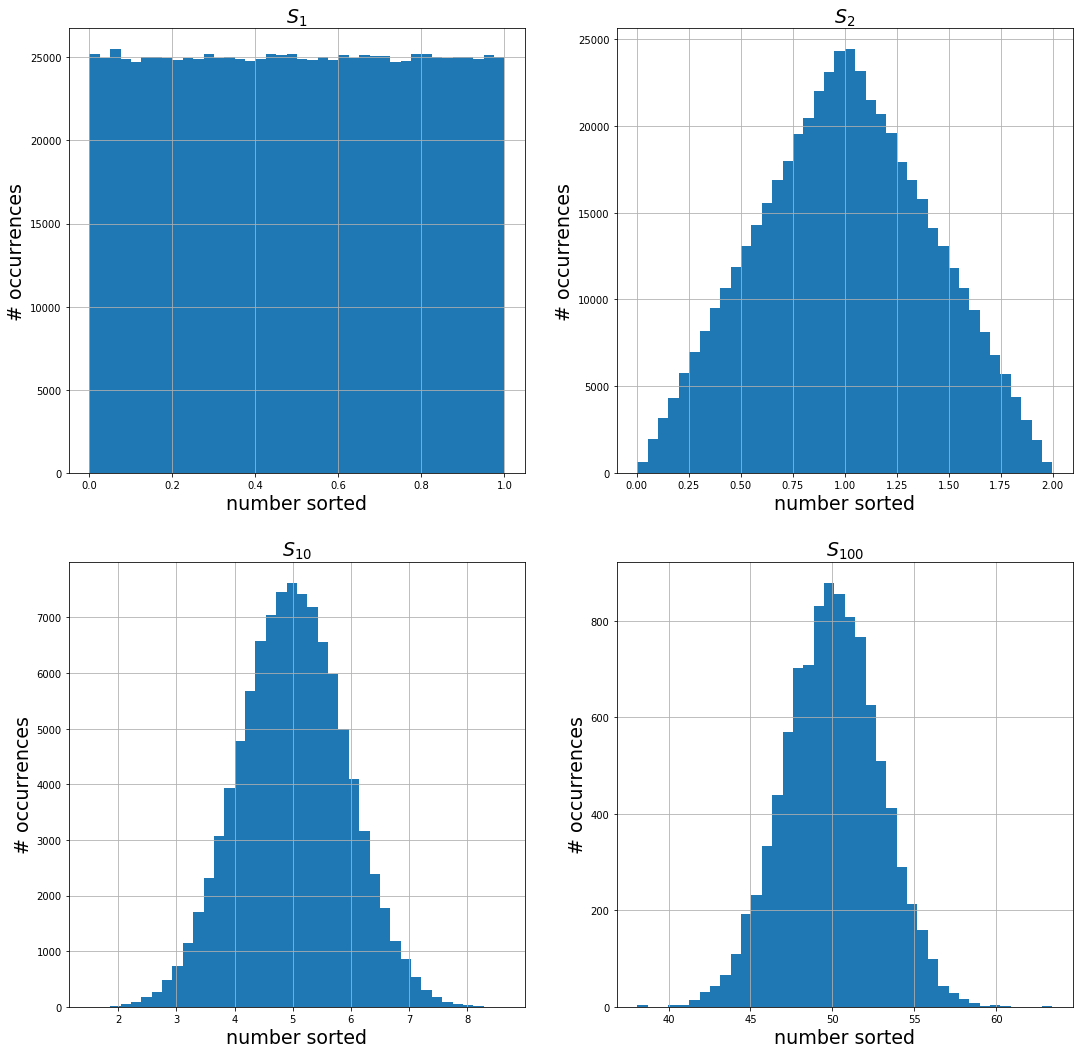

In [36]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.mlab as mlab
import numpy as np

filename = "esercizio01_2/unifS_1.txt"

f = open(filename, 'r')
rows = f.readlines()
f.close()

un_1 = [float(x_un) for x_un in rows]

filename = "esercizio01_2/unifS_2.txt"

f = open(filename, 'r')
rows = f.readlines()
f.close()

un_2 = [float(x_un) for x_un in rows]

filename = "esercizio01_2/unifS_10.txt"

f = open(filename, 'r')
rows = f.readlines()
f.close()

un_10 = [float(x_un) for x_un in rows]

filename = "esercizio01_2/unifS_100.txt"

f = open(filename, 'r')
rows = f.readlines()
f.close()

un_100 = [float(x_un) for x_un in rows]

plt.figure(figsize=[18, 18])

plt.subplot(2,2,1)
plt.hist(un_1, bins=40)
plt.title('$S_1$',fontsize=19)
plt.xlabel('number sorted',fontsize=19)
plt.ylabel('# occurrences',fontsize=19)
plt.grid(True)

plt.subplot(2,2,2)
plt.hist(un_2, bins=40)
plt.title('$S_2$',fontsize=19)
plt.xlabel('number sorted',fontsize=19)
plt.ylabel('# occurrences',fontsize=19)
plt.grid(True)

plt.subplot(2,2,3)
plt.hist(un_10, bins=40)
plt.title('$S_{10}$',fontsize=19)
plt.xlabel('number sorted',fontsize=19)
plt.ylabel('# occurrences',fontsize=19)
plt.grid(True)

plt.subplot(2,2,4)
plt.hist(un_100, bins=40)
plt.title('$S_{100}$',fontsize=19)
plt.xlabel('number sorted',fontsize=19)
plt.ylabel('# occurrences',fontsize=19)
plt.grid(True)

plt.show()

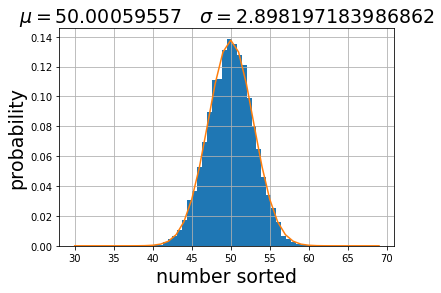

In [39]:
plt.hist(un_100, bins=40, density=True)
(mu, sigma) = norm.fit(un_100)
x_axis = np.arange(30, 70, 1)
y = norm.pdf(x_axis, mu, sigma)
plt.plot(x_axis, y)
plt.title('$\mu = $'+str(mu)+ "   $\sigma = $"+str(sigma),fontsize=19)
plt.xlabel('number sorted',fontsize=19)
plt.ylabel('probability',fontsize=19)
plt.grid(True)
plt.show()

Notiamo che la media corrisponde a $\langle S_{100}\rangle \approx 50 = 100*\frac{1}{2}=100\langle S_1 \rangle$, e la varianza è $\sigma^2_{S_{100}}=8.39956\approx100*\frac{1}{12}=100\sigma^2_{S_1}$, come ci attendevamo.

## Dado esponenziale

Di seguito riporto il caso del dado esponenziale con $\lambda = 1$, con gli istogrammi relativi, rispettivamente, a $S_1$, $S_2$, $S_{10}$, $S_{100}$:

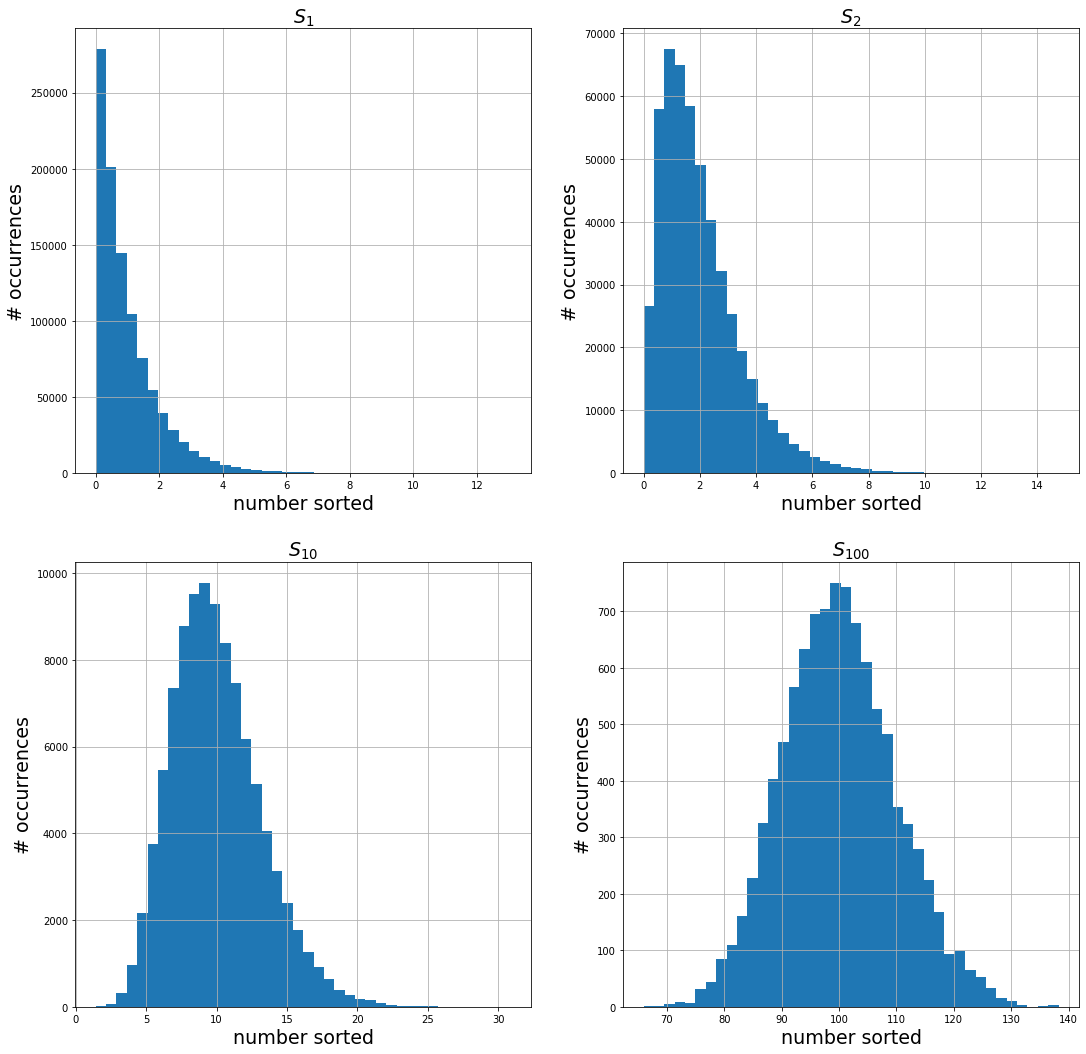

In [40]:
import matplotlib.pyplot as plt

filename = "esercizio01_2/expS_1.txt"

f = open(filename, 'r')
rows = f.readlines()
f.close()

exp_1 = [float(x_exp) for x_exp in rows]

filename = "esercizio01_2/expS_2.txt"

f = open(filename, 'r')
rows = f.readlines()
f.close()

exp_2 = [float(x_exp) for x_exp in rows]

filename = "esercizio01_2/expS_10.txt"

f = open(filename, 'r')
rows = f.readlines()
f.close()

exp_10 = [float(x_exp) for x_exp in rows]

filename = "esercizio01_2/expS_100.txt"

f = open(filename, 'r')
rows = f.readlines()
f.close()

exp_100 = [float(x_exp) for x_exp in rows]

plt.figure(figsize=[18, 18])

plt.subplot(2,2,1)
plt.hist(exp_1, bins=40)
plt.title('$S_1$',fontsize=19)
plt.xlabel('number sorted',fontsize=19)
plt.ylabel('# occurrences',fontsize=19)
plt.grid(True)

plt.subplot(2,2,2)
plt.hist(exp_2, bins=40)
plt.title('$S_2$',fontsize=19)
plt.xlabel('number sorted',fontsize=19)
plt.ylabel('# occurrences',fontsize=19)
plt.grid(True)

plt.subplot(2,2,3)
plt.hist(exp_10, bins=40)
plt.title('$S_{10}$',fontsize=19)
plt.xlabel('number sorted',fontsize=19)
plt.ylabel('# occurrences',fontsize=19)
plt.grid(True)

plt.subplot(2,2,4)
plt.hist(exp_100, bins=40)
plt.title('$S_{100}$',fontsize=19)
plt.xlabel('number sorted',fontsize=19)
plt.ylabel('# occurrences',fontsize=19)
plt.grid(True)

plt.show()



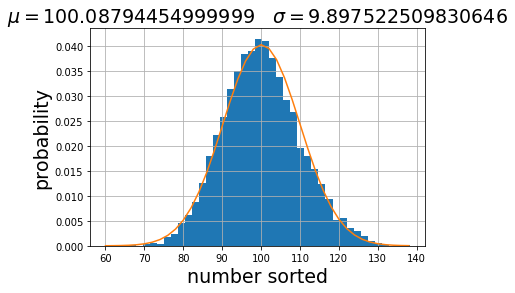

In [41]:
plt.hist(exp_100, bins=40, density=True)
(mu, sigma) = norm.fit(exp_100)
x_axis = np.arange(60, 140, 2)
y = norm.pdf(x_axis, mu, sigma)
plt.plot(x_axis, y)
plt.title('$\mu = $'+str(mu)+ "   $\sigma = $"+str(sigma),fontsize=19)
plt.xlabel('number sorted',fontsize=19)
plt.ylabel('probability',fontsize=19)
plt.grid(True)
plt.show()

Analogamente al caso del dado standard, notiamo che la media corrisponde a $\langle S_{100}\rangle \approx 100=100\langle S_1 \rangle$, e la varianza è $\sigma^2_{S_{100}}\approx 100 =100\sigma^2_{S_1}$ ($\langle S_1 \rangle = 1$ e $\sigma^2_{S_1} = 1$ nel caso $\lambda = 1$), come ci attendevamo.
Posso dunque affermare di aver verificato il teorema del limite centrale, in quanto, come si osserva facilmente, all'aumentare dei numeri sommati la distribuzione ottenuta assume sempre più la forma di una curva gaussiana, e il fit eseguito nel caso $N = 100$ ce ne da la definitiva conferma. La distribuzione gaussiana è un attrattore per la distribuzione esponenziale.

## Dado lorentziano

Di seguito riporto i risultati della stessa analisi nel caso di dado lorentziano.

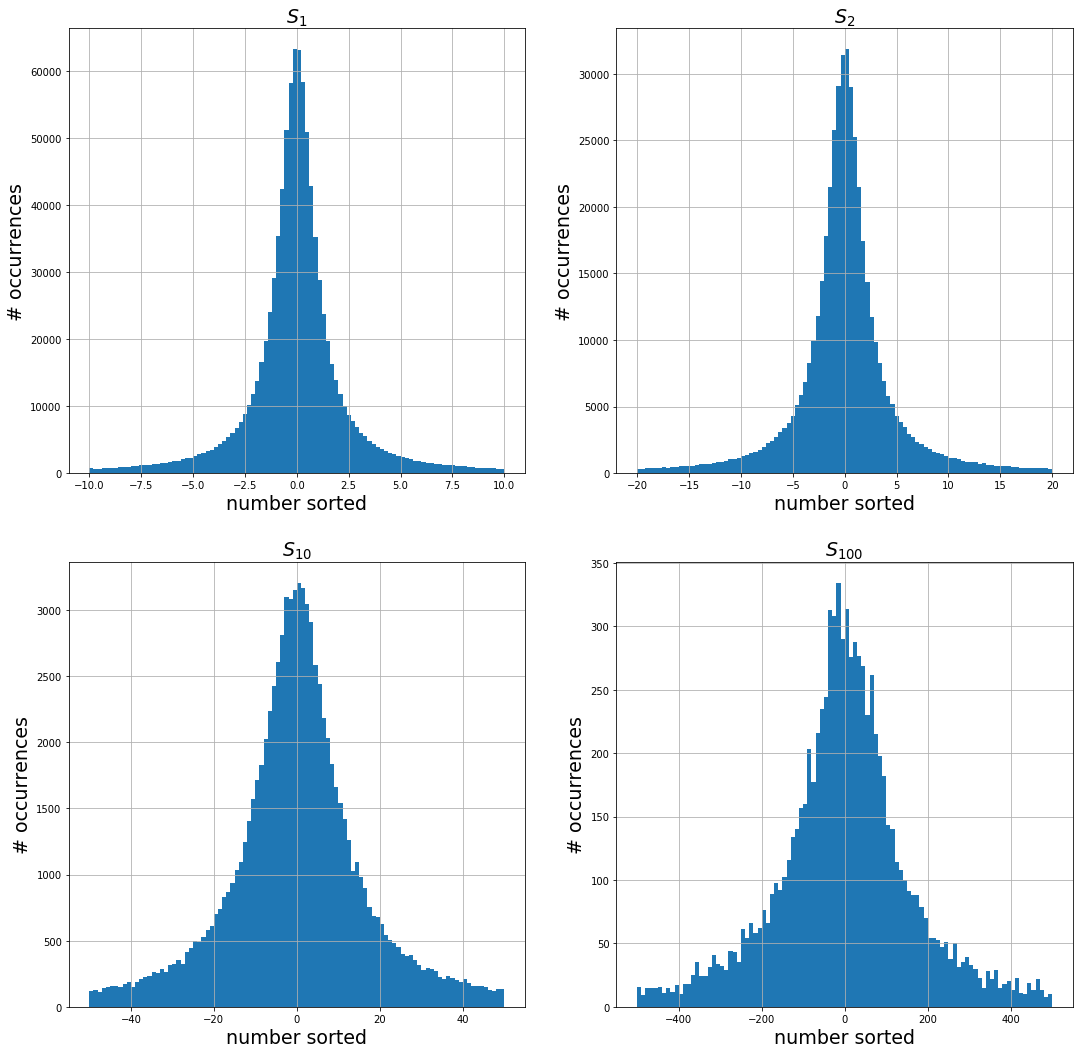

In [7]:
import matplotlib.pyplot as plt

filename = "esercizio01_2/lorS_1.txt"

f = open(filename, 'r')
rows = f.readlines()
f.close()

lor_1 = [float(x_lor) for x_lor in rows]

filename = "esercizio01_2/lorS_2.txt"

f = open(filename, 'r')
rows = f.readlines()
f.close()

lor_2 = [float(x_lor) for x_lor in rows]

filename = "esercizio01_2/lorS_10.txt"

f = open(filename, 'r')
rows = f.readlines()
f.close()

lor_10 = [float(x_lor) for x_lor in rows]

filename = "esercizio01_2/lorS_100.txt"

f = open(filename, 'r')
rows = f.readlines()
f.close()

lor_100 = [float(x_lor) for x_lor in rows]

plt.figure(figsize=[18, 18])

plt.subplot(2,2,1)
plt.hist(lor_1, bins=100, range=[-10,10])
plt.title('$S_1$',fontsize=19)
plt.xlabel('number sorted',fontsize=19)
plt.ylabel('# occurrences',fontsize=19)
plt.grid(True)

plt.subplot(2,2,2)
plt.hist(lor_2, bins=100, range=[-20,20])
plt.title('$S_2$',fontsize=19)
plt.xlabel('number sorted',fontsize=19)
plt.ylabel('# occurrences',fontsize=19)
plt.grid(True)

plt.subplot(2,2,3)
plt.hist(lor_10, bins=100, range=[-50,50])
plt.title('$S_{10}$',fontsize=19)
plt.xlabel('number sorted',fontsize=19)
plt.ylabel('# occurrences',fontsize=19)
plt.grid(True)

plt.subplot(2,2,4)
plt.hist(lor_100, bins=100, range=[-500,500])
plt.title('$S_{100}$',fontsize=19)
plt.xlabel('number sorted',fontsize=19)
plt.ylabel('# occurrences',fontsize=19)
plt.grid(True)

plt.show()



Si noti come nelle figure sopra l'intervallo su cui visualizzo l'istogramma vari.

# Esercizio 1.3

Per simulare l'esperimento di Buffon ho anzitutto notato che il pattern di linee trasversali è periodico con periodicità $d$ (distanza fra due linee). Posso quindi estrarre la posizione di uno dei due estremi del bastoncino $p_1$ da una distribuzione di probabilità uniforme (monodimensionale) fra $0$ e $d$ senza perdere di generalità.  
Suppongo che il bastoncino sia simmetrico rispetto al piano passante per il suo punto medio e perpendicolare al suo asse. Esso può cadere formando un angolo $\theta$ tra $0$ e $\pi/2$ rispetto alle linee trasversali. Quello che interessa però, è che la quantità $p_2=p_1+L\sin(\theta)$ sia maggiore o minore di $d$.
Ho simulato un milione di lanci, divisi in 100 blocchi.

Text(0, 0.5, '$\\pi$')

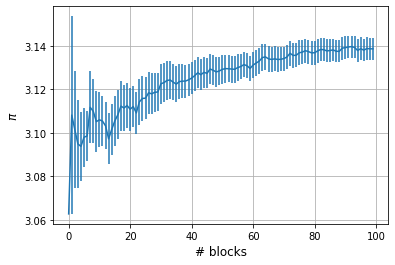

In [11]:
import numpy as np

filename = "esercizio01_3/Buffon.dat"
pi = np.loadtxt(filename, usecols = 0)
pi_err = np.loadtxt(filename, usecols = 1)
blocks = np.arange(0,np.size(pi))
plt.errorbar(blocks, pi, yerr = pi_err)
plt.grid()
  
plt.xlabel('# blocks', fontsize = 12)
plt.ylabel('$\pi$', fontsize = 12)

Come si può osservare dal grafico, la simulazione fa convergere il valore di $\pi$ al valore noto 3.14156... entro l'errore calcolato.